In [ ]:
import numpy as np
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import time

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,GRU,Dropout
from sklearn.preprocessing import MinMaxScaler   #change this part to diffrent Methods asked in 11

In [ ]:
import pandas as pd
import datetime
import pandas_datareader as pdr
from pandas import Series,DataFrame
start=datetime.datetime(2014,9,20)
end=datetime.datetime(2021,5,20)
df=pdr.get_data_yahoo(['BTC-USD'],start=start,end=end)
df.drop('Adj Close', inplace=True, axis=1)

In [ ]:
# df

# Specify inputs

In [ ]:
seq=27   #Set from 24_28
tt=0

# Data & Preprocessing

In [ ]:
# list1=['Close','High','Low','Open','Volume']   #Change it:List of desired X Features
list1=['Close','Low','Open']   #Change it:List of desired X Features
df1=df[list1]
data=df1.values

In [ ]:
hh=len(list1)   #feature dimension

In [ ]:
training_data=data[:2000,:]
data_test=data[2000:,:]

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
# training_data

In [ ]:
X_train = [] 
Y_train = []
for i in range(seq, training_data.shape[0]):
   X_train.append(training_data[i-seq:i,:])
   Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
scaler = MinMaxScaler()
data_test = scaler.fit_transform(data_test)
# data_test
X_test = []
Y_test = []
for i in range (seq, data_test.shape[0]):
  X_test.append(data_test[i-seq:i,:])
  Y_test.append(data_test[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
# X_test.shape,Y_test.shape

In [ ]:
X_train.shape

(1973, 27, 3)

In [ ]:
#Change the following blocks,RNN,GRU,LSTM Also the activation Function

# Build The Model

In [ ]:
model = Sequential() 
model.add(GRU(units = seq , activation = 'tanh', input_shape = (seq, hh)))    #return_sequences = True
# model.add(Dropout(0.2))
model.add(Dense(10, activation="relu")) 
model.add(Dense(1))
model.compile(loss='MSE', optimizer='Adam')
model.summary()



# history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 27)                2592      
_________________________________________________________________
dense (Dense)                (None, 10)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,883
Trainable params: 2,883
Non-trainable params: 0
_________________________________________________________________


# Fit the model on our data

In [ ]:
start=time.time()
history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)
print("The test results for loss is")
model.evaluate(X_test, Y_test, batch_size=10, verbose=1)
end=time.time()
tt=end-start
print('The fitting and evaluation time is:  ',tt,'Seconds')


Epoch 1/20
53/53 [==============================] - 22s 18ms/step - loss: 0.0482 - val_loss: 0.0044
Epoch 2/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 4.6959e-04
Epoch 3/20
53/53 [==============================] - 0s 4ms/step - loss: 2.8929e-04 - val_loss: 4.4802e-04
Epoch 4/20
53/53 [==============================] - 0s 5ms/step - loss: 3.2371e-04 - val_loss: 4.2249e-04
Epoch 5/20
53/53 [==============================] - 0s 4ms/step - loss: 3.1398e-04 - val_loss: 3.7414e-04
Epoch 6/20
53/53 [==============================] - 0s 4ms/step - loss: 3.3152e-04 - val_loss: 5.5103e-04
Epoch 7/20
53/53 [==============================] - 0s 4ms/step - loss: 2.6579e-04 - val_loss: 3.6518e-04
Epoch 8/20
53/53 [==============================] - 0s 5ms/step - loss: 3.0985e-04 - val_loss: 3.4697e-04
Epoch 9/20
53/53 [==============================] - 0s 4ms/step - loss: 3.4552e-04 - val_loss: 3.3743e-04
Epoch 10/20
53/53 [==============================] - 0s 

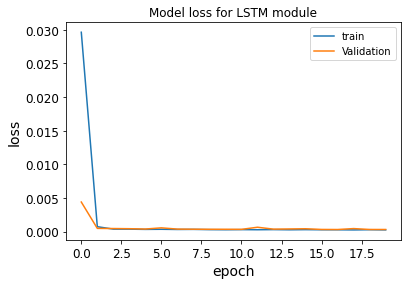

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for LSTM module')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim([0,0.005])
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

#Stack

In [ ]:
set_num=0
djp=7

In [ ]:
vv=X_test[set_num,:,:]
testPredict1=np.zeros(djp)
for i in range(djp):                ##Predict minimum for next seven days
  j=i+1
  testPredict1[i]= model.predict(vv.reshape((1,seq,hh)))
  X_test[set_num+1,:,:][-j:,0]=np.flip(testPredict1[:j])
  # print(X_test[set_num+1,:,:][-1][0],'2')
  vv=X_test[set_num+1,:,:]

In [ ]:
# vv=X_test[set_num,:,:]
# testPredict1=np.zeros(djp)
# for i in range(djp):                ##Predict minimum for next seven days

#   testPredict1[i]= model.predict(vv.reshape((1,seq,hh)))
#   X_test[set_num+1,:,:][-1][0]=testPredict1[i]
#   # print(X_test[set_num+1,:,:][-1][0],'2')
#   vv=X_test[set_num+1,:,:]

In [ ]:
testPredict1

array([0.03645159, 0.03678226, 0.03664831, 0.03654142, 0.03656527,
       0.03653936, 0.03648749])

In [ ]:
scale = 1/scaler.scale_[0]
d=testPredict1*scale

In [ ]:
gg=model.predict(X_test[set_num:set_num+djp,:,:])

In [ ]:
# g=gg*scale
# # g,d

In [ ]:
Y_ff=Y_test[set_num:set_num+djp]*scale

(0.0, 5000.0)

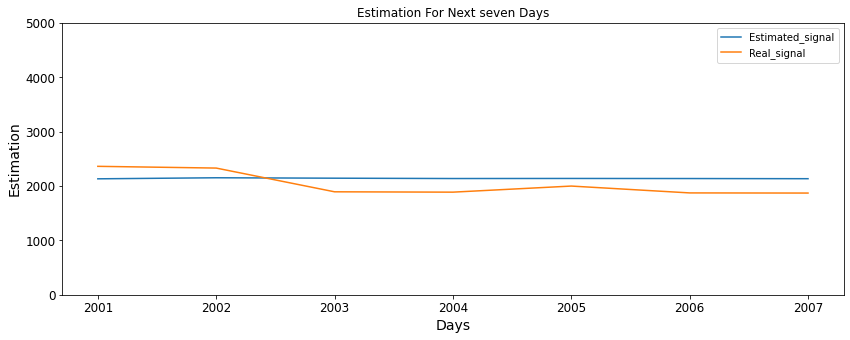

In [ ]:
plt.figure(figsize=(14,5))
plt.title("Estimation For Next seven Days")
Days=np.arange(djp)+2000+set_num+1
plt.plot(Days,d,label="Estimated_signal")
plt.plot(Days,Y_ff,label="Real_signal")
plt.ylabel('Estimation')
plt.xlabel('Days')
plt.legend()
# plt.ylim([40000,58000])
plt.ylim([0,5000])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2)